In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from xgboost import plot_importance
import numpy as np
import pathlib
import pickle
import os

In [2]:
df = pd.read_csv("../data/Significant_features.csv")

In [3]:
X = df.drop('label', axis=1)
y = df['label'].map({'fake': 0, 'real': 1})

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=400)

In [6]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [7]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [8]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.43%


In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4620  112]
 [ 119 4129]]


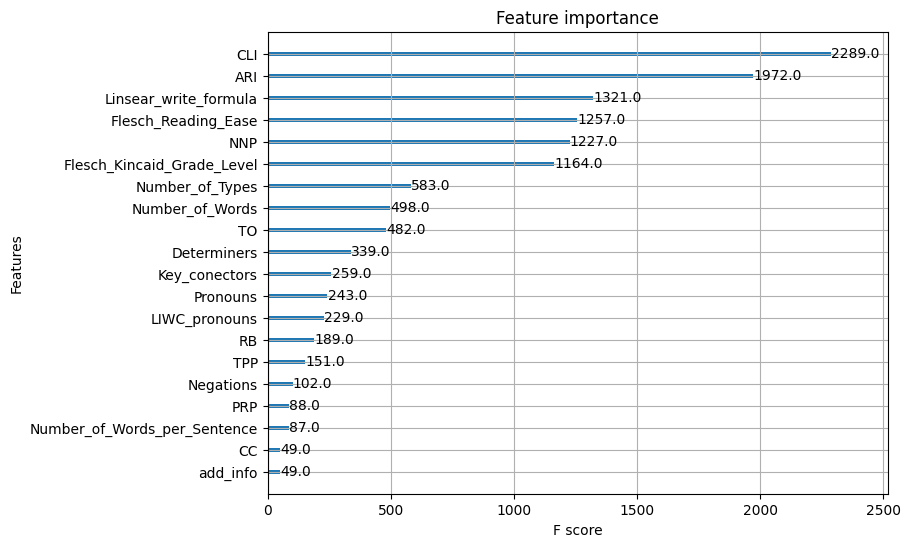

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
plot_importance(xgb_model, ax=ax, importance_type='weight')
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [12]:
skf = StratifiedKFold(n_splits=100, shuffle=True, random_state=42)

In [13]:
cv_scores = cross_val_score(xgb_model, X, y, cv=skf, scoring='accuracy')

In [14]:
print(f'CV mean score: {np.mean(cv_scores):.2f}')

CV mean score: 0.98


In [15]:
classifier_location = "../src/fnClassification/Models/"
os.makedirs(classifier_location, exist_ok=True)  # Create directory if it doesn't exist
model_filename = os.path.join(classifier_location, 'XG_boost.pkl')

with open(model_filename, 'wb') as file:
    pickle.dump(xgb_model, file)

print(f"XGBoost model saved to: {model_filename}")

XGBoost model saved to: ../src/fnClassification/Models/XG_boost.pkl
